# Forecasting the Popularity of Programming Languages (2019–2024
# Problem statement:
predicting programming language popularity from search interest.
# Objectives : 
- Understand past trends.
- Compare Python, Java, C++.

- Forecast future popularity.



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('programming language trend over time.csv', parse_dates=['Week'],index_col='Week')

In [3]:
df.head()

Python  Java  C++
Week                         
2019-04-21      55    55   18
2019-04-28      52    50   16
2019-05-05      56    56   17
2019-05-12      56    61   18
2019-05-19      57    56   17

### 1.1 Data preparation

In [4]:
## checking for missing values
def verify_data(df):
    missing_values = df.isnull().sum().sum()
    if missing_values > 0:
        print(f"Warning: The dataset contains {missing_values} missing values.")
    else:
        print("No missing values found.")
verify_data(df) 

No missing values found.


In [5]:
## checking for duplicates
def verify_data(df):
    duplicate_data = df.duplicated().sum()
    if duplicate_data > 0:
        print(f"Warning: The dataset contains {duplicate_data} duplicate data.")
    else:
        print("No duplicate data found")
verify_data(df)

In [6]:
## dropping duplicates
df = df.drop_duplicates()
verify_data(df)

No duplicate data found


In [7]:
## confirming the time index is correctly set and in chronological order
if not isinstance(df.index, pd.DatetimeIndex):
    print("Warning:The index is not a DatetimeIndex.")
else:
    print("The index is correctly set as a DatetimeIndex.")

    if df.index.is_monotonic_increasing:
        print("The time index is in chronological order.")
    else:
        print("Warning: The time index is not in chronological order.")
        df = df.sort_index()
        print("The DataFrame has been sorted in chronological order.")
df.head()

The index is correctly set as a DatetimeIndex.
The time index is in chronological order.


Python  Java  C++
Week                         
2019-04-21      55    55   18
2019-04-28      52    50   16
2019-05-05      56    56   17
2019-05-12      56    61   18
2019-05-19      57    56   17

### 1.2 Analysing Data

### Daily search interest score for Python

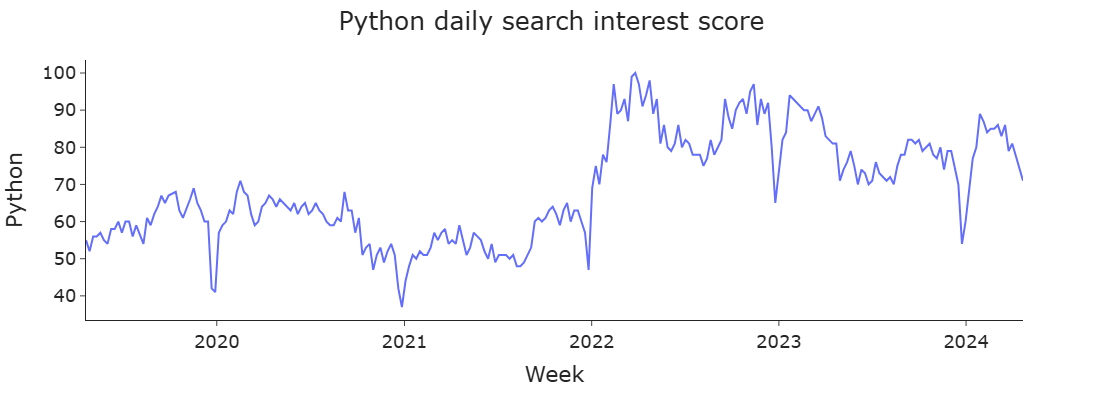

In [8]:
## Plotting the data column Python
import plotly.express as px
fig = px.line(df, x=df.index, y= 'Python',
              labels =({'Python':'Python', 'Week':'Week'}))
fig.update_layout(template = 'simple_white', font = dict(size=18),
                  title_text='Python daily search interest score', width =650, title_x=0.5, height=400)
fig.show()

this graph shows fluctuating values with a notable level shift upward around 2022.

### Seasonal decomposition for Python

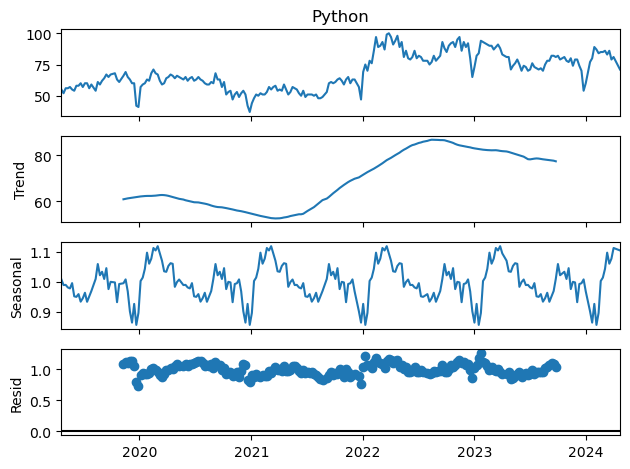

In [9]:
## Multiplicative trends for Python
decomposition_plot_multi = seasonal_decompose(df['Python'],
                                              model='multiplicative', period=52)
decomposition_plot_multi.plot()
plt.show()

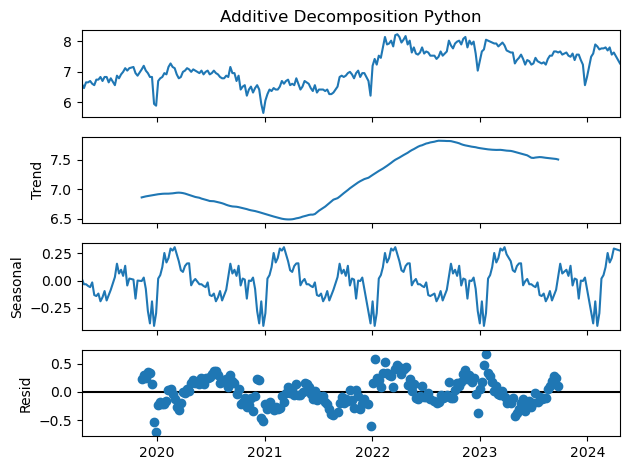

In [10]:
## Additive trends for Python
from scipy.stats import boxcox
df['Additive Decomposition Python'], lam = boxcox(df['Python'])

# Plot the decomposition for additive series
decomposition_plot_add = seasonal_decompose(df['Additive Decomposition Python'],
                                            model='additive', period=52)
decomposition_plot_add.plot()
plt.show()

Interpretations for python

The seasonal decomposition of Python search interest series was performed using both Additive and multiplicative models, breaking the series into its trend, seasonal, and residual components.

The trend component does not follow a consistent upward or downward pattern, it initially decreases, then rises, and begins to decline again, this suggests shifts in interest over time.

The seasonal component displays a clear repeating pattern that maintains a consistent shape throughout the period.

The residual component shows remaining irregular fluctuations after removing trend and seasonality.

### Daily search interest for Java

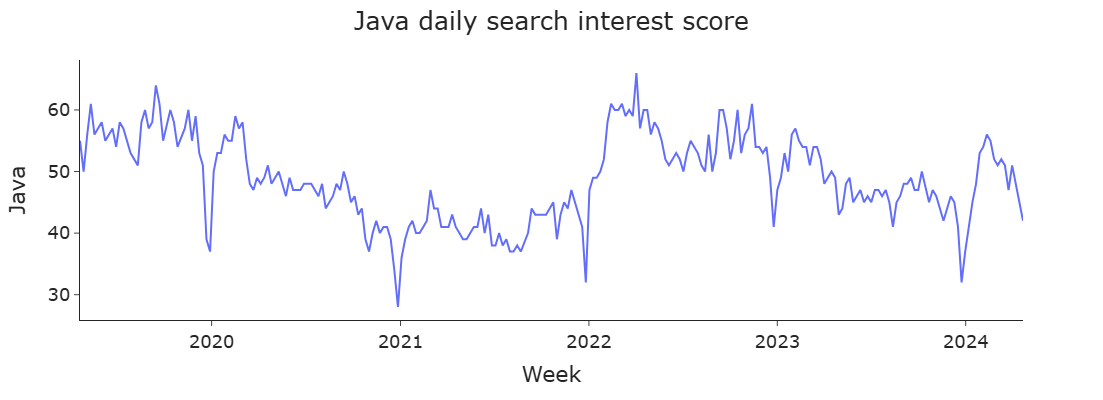

In [11]:
## Plotting the data column Java
import plotly.express as px
fig = px.line(df, x=df.index, y= 'Java',
              labels =({'Java':'Java', 'Week':'Week'}))
fig.update_layout(template = 'simple_white', font = dict(size=18),
                  title_text='Java daily search interest score', width =650, title_x=0.5, height=400)
fig.show()

Interpretations for the line graph

From the graph we wee that:
There is clear fluctuations, with occasional dips and peaks.

There was a notable decline around late 2020 and early 2021.

A surge in interest occurred in early 2022.

The trend appears cyclical with some seasonal or periodic changes.



## Seasonal decomposition for Java

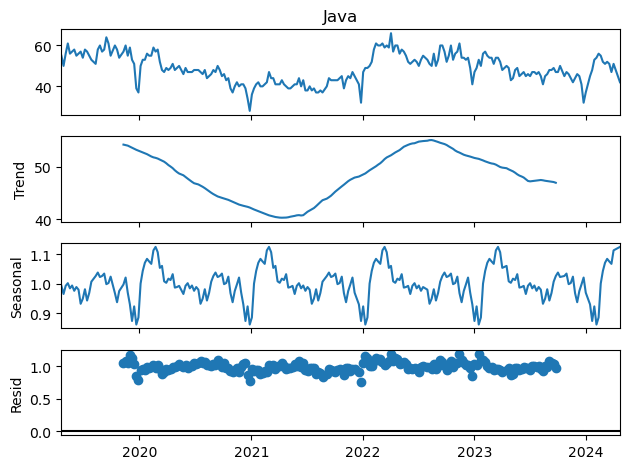

<Figure size 640x480 with 0 Axes>

In [12]:
## Multiplicative trends for Java
decomposition_plot_multi = seasonal_decompose(df['Java'],
                                              model='multiplicative', period=52)
decomposition_plot_multi.plot()
plt.show()
plt.savefig('Java multiplicative decomposition.png', dpi=300)

Analysis of Multiplicative decomposition

Trend: Similar to the additive model—shows longer-term dips and rises.

Seasonal: The seasonal effect scales with the trend—larger variation when interest is high.

Residual: Shows proportional noise, i.e., deviations become larger or smaller relative to the overall level of interest.

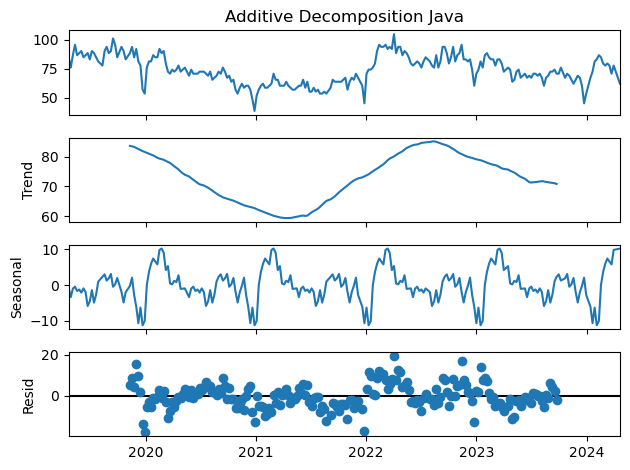

<Figure size 640x480 with 0 Axes>

In [13]:
## Additive trends for Java
from scipy.stats import boxcox
df['Additive Decomposition Java'], lam = boxcox(df['Java'])

# Plot the decomposition for additive series
decomposition_plot_add = seasonal_decompose(df['Additive Decomposition Java'],
                                            model='additive', period=52)
decomposition_plot_add.plot()
plt.show()
plt.savefig('Java Additive decomposition.png', dpi=300)

##### Trend component Analysis

Clear U shaped pattern indicating non linear trend

Declining from 85 in early 2020 t0 60 in mid 2021

Rising back to 85 by early 2023

This suggests potential need for differencing despite ADF test results.

##### Seasonal Component Analysis

Regular pattern repeating approximately 5 times over the period

For weekly data, this indicates annual seasonality(52 week pattern)

Clear indication that seasonal differencing or seasonal AR/MA terms are needed





Analysis of C++ line plot

The C++ search interest score fluctuates between 2019 and 2024.

A clear upward trend is visible from around mid-2021 to early 2023, peaking close to 30.

After the peak in early 2023, there's a gradual decline until 2024.

Overall, the data shows medium volatility and a visible long-term increase followed by decrease.

### Daily search interest score for C++

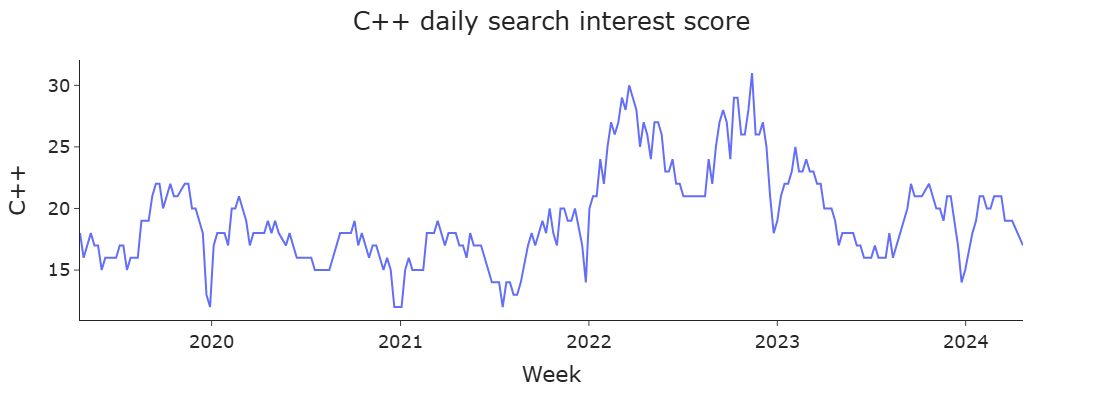

In [14]:
## Plotting the data column c++
import plotly.express as px
fig = px.line(df, x=df.index, y= 'C++',
              labels =({'C++':'C++', 'Week':'Week'}))
fig.update_layout(template = 'simple_white', font = dict(size=18),
                  title_text='C++ daily search interest score', width =650, title_x=0.5, height=400)
fig.show()

### Seasonal decomposition for C++

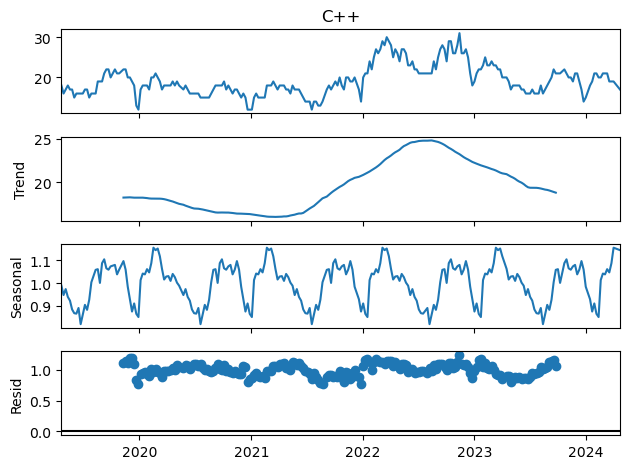

<Figure size 640x480 with 0 Axes>

In [15]:
## Multiplicative trends for C++
decomposition_plot_multi = seasonal_decompose(df['C++'],
                                              model='multiplicative', period=52)
decomposition_plot_multi.plot()
plt.show()
plt.savefig('Java multiplicative decomposition.png', dpi=300)

Analysis of Multiplicative decomposition

Trend: upward from 2021 and then declining.

Seasonal Component:Similar shape to additive, but amplitude of fluctuations changes with the level of the trend.When interest is high, seasonal swings become more pronounced, supporting multiplicative modeling.

Residual:Appears less stable than additive, with amplified deviations when the trend peaks.Indicates multiplicative model may overstate volatility at the peaks.

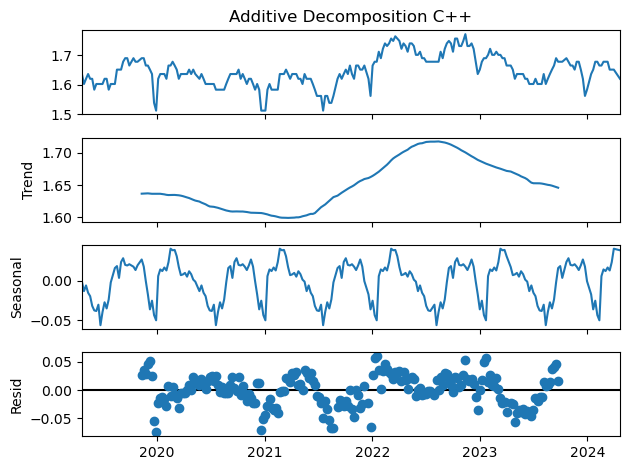

<Figure size 640x480 with 0 Axes>

In [16]:
## Additive trends for C++
from scipy.stats import boxcox
df['Additive Decomposition C++'], lam = boxcox(df['C++'])

# Plot the decomposition for additive series
decomposition_plot_add = seasonal_decompose(df['Additive Decomposition C++'],
                                            model='additive', period=52)
decomposition_plot_add.plot()
plt.show()
plt.savefig('C++ Additive decomposition.png', dpi=300)

#### Model Selection:

The seasonality: the plot shows strong seasonal component with a regular pattern that repeats over time, this appears to be consistent over the years

Trend: There is a moderate trend component is visible




### 1.3 Stationarity

In [17]:
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue=dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue<0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is Not stationary')

In [18]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels =['ADF test statistic','p-value','#lags Used','Number of observation Used']
    for value,label in zip(result,labels):
        print(label+' : ' +str(value))
        if result[1] <= 0.05:
            print('strong evidence against null hypothesis, Data is stationary')
        else:
            print('Data is non stationary')

### Stationarity test for Python data


In [19]:
## stationarity test for Python Data
adfuller_test(df['Python'])

ADF test statistic : -2.2985596968320587
Data is non stationary
p-value : 0.17243291874959377
Data is non stationary
#lags Used : 2
Data is non stationary
Number of observation Used : 247
Data is non stationary


In [20]:
## taking the difference for Python data
df['Python_diff']=df['Python'].diff()
df=df.dropna()

In [21]:
## checking stationarity Python data
adfuller_test(df['Python_diff'])

ADF test statistic : -13.209961517328912
strong evidence against null hypothesis, Data is stationary
p-value : 1.0519388839586413e-24
strong evidence against null hypothesis, Data is stationary
#lags Used : 1
strong evidence against null hypothesis, Data is stationary
Number of observation Used : 247
strong evidence against null hypothesis, Data is stationary


### Stationarity test for Java

In [22]:
## stationarity test for Java Data
adfuller_test(df['Java'])

ADF test statistic : -3.1719566526478515
strong evidence against null hypothesis, Data is stationary
p-value : 0.02166641269754275
strong evidence against null hypothesis, Data is stationary
#lags Used : 2
strong evidence against null hypothesis, Data is stationary
Number of observation Used : 246
strong evidence against null hypothesis, Data is stationary


### Stationarity test for C++

In [23]:
## stationarity test for C++
adfuller_test(df['C++'])

ADF test statistic : -2.568762792123049
Data is non stationary
p-value : 0.09962674129686916
Data is non stationary
#lags Used : 2
Data is non stationary
Number of observation Used : 246
Data is non stationary


In [24]:
## taking the diffence for C++
df['C++_diff']=df['C++'].diff()
df=df.dropna()

In [25]:
## checking stationarity
adfuller_test(df['C++_diff'])

ADF test statistic : -13.605818304994186
strong evidence against null hypothesis, Data is stationary
p-value : 1.9143301665002108e-25
strong evidence against null hypothesis, Data is stationary
#lags Used : 1
strong evidence against null hypothesis, Data is stationary
Number of observation Used : 246
strong evidence against null hypothesis, Data is stationary


# Model Selection



In [26]:
df.head()

Python  Java  C++  Additive Decomposition Python  \
Week                                                           
2019-05-05      56    56   17                       6.657272   
2019-05-12      56    61   18                       6.657272   
2019-05-19      57    56   17                       6.702405   
2019-05-26      55    57   17                       6.611516   
2019-06-02      54    58   15                       6.565117   

            Additive Decomposition Java  Additive Decomposition C++  \
Week                                                                  
2019-05-05                    86.755394                    1.620161   
2019-05-12                    95.769111                    1.636408   
2019-05-19                    86.755394                    1.620161   
2019-05-26                    88.549142                    1.620161   
2019-06-02                    90.347454                    1.583126   

            Python_diff  C++_diff  
Week                               
2019-05-05          4.0       1.0  
2019-05-12          0.0       1.0  
2019-05-19          1.0      -1.0  
2019-05-26         -2.0       0.0  
2019-06-02         -1.0      -2.0

### Model Selection for Python data

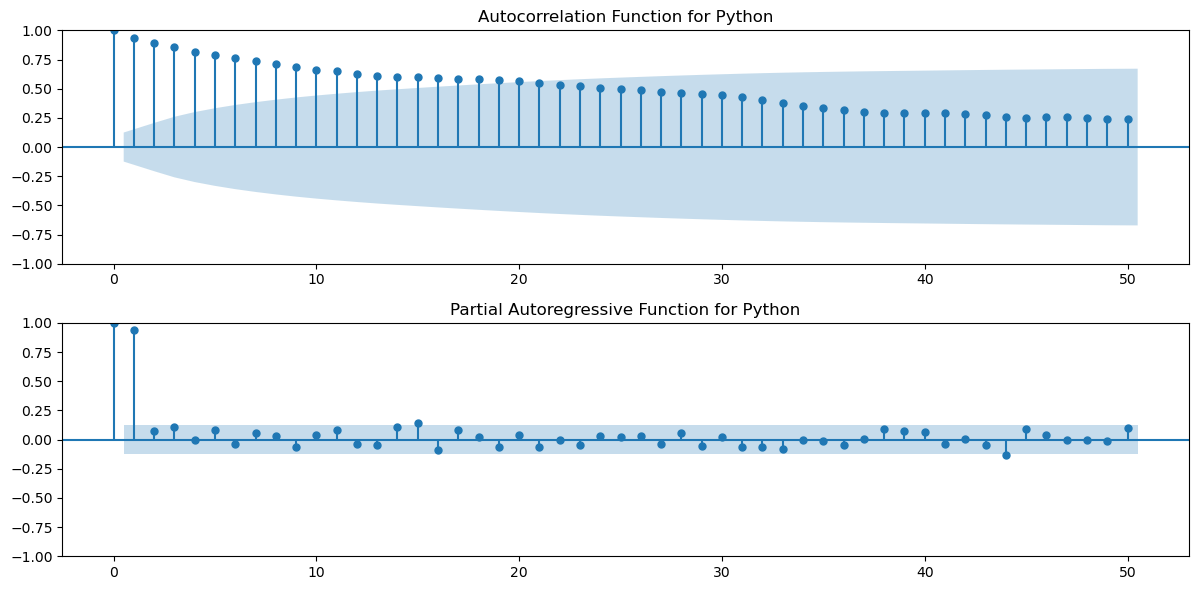

<Figure size 640x480 with 0 Axes>

In [27]:
## ACF and PACF plots for Python
fig,(ax1,ax2)=plt.subplots(nrows=2,figsize=(12,6))
plot_acf(df['Python'],lags=50,ax=ax1)
ax1.set_title('Autocorrelation Function for Python')
plot_pacf(df['Python'], lags=50, ax=ax2)
ax2.set_title('Partial Autoregressive Function for Python')
plt.tight_layout()
plt.show()
plt.savefig('Python acf and pacf.png', dpi=300)

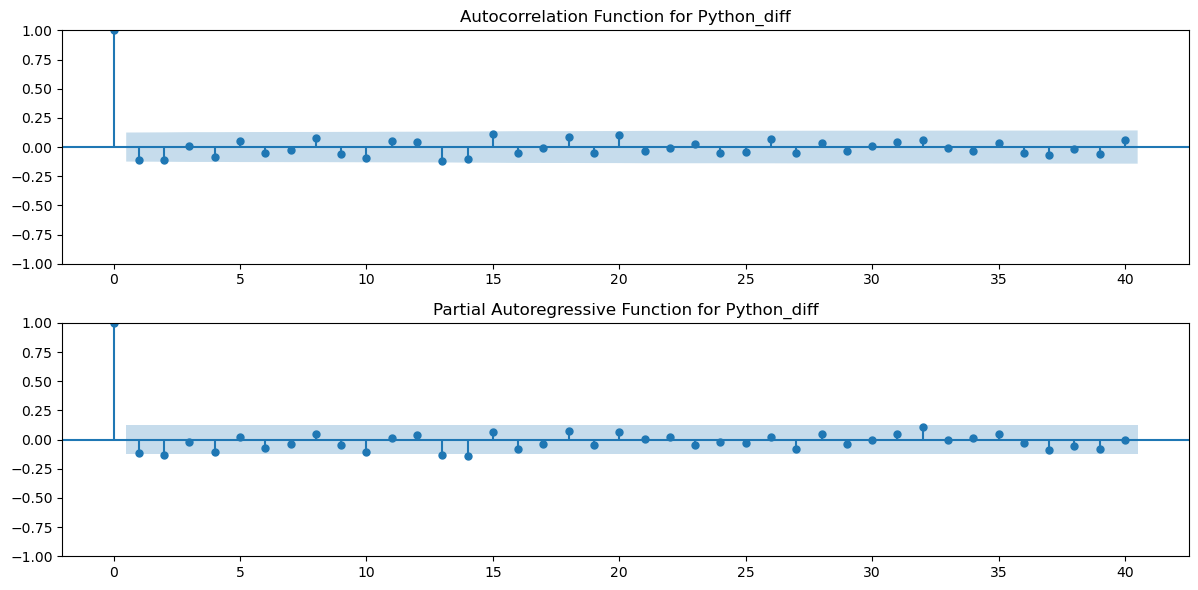

In [28]:
## ACF and PACF plots for Python_diff
fig,(ax1,ax2)=plt.subplots(nrows=2,figsize=(12,6))
plot_acf(df['Python_diff'],lags=40,ax=ax1)
ax1.set_title('Autocorrelation Function for Python_diff')
plot_pacf(df['Python_diff'], lags=40, ax=ax2)
ax2.set_title('Partial Autoregressive Function for Python_diff')
plt.tight_layout()
plt.savefig('Python_diff acf and pacf.png', dpi=300)
plt.show()

#### From the ACF and PACF of the  python data we see that

##### SARIMA(1,1,1)(1,1,1)52 is the appropriate model
 d= 1 because  the data has been differenced once 
 
 D=1 the seasonal pattern observed in the decomposition was strong and consistent
 ##### AR and MA terms (p=1, q=1)

 ACF shows a significant spike at  the first lag  and cuts off, suggesting an MA(1) component
 
 PACF also shows a significant spike at the first lag followed by smaller values, suggesting an AR(1) component

 ##### Seasonal AR and MA terms (P=1, Q=1)

  the seasonal component in the decomposition is regular but not perfectly deterministic
  
   Seasonal AR(1) and MA(1) terms can capture this pattern effectively








### Model fit for Python

In [29]:
model = SARIMAX(df['Python'], order=(1,1,1), seasonal_order=(1,1,1,52))
results_Python = model.fit()
print(results_Python.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             Python   No. Observations:                  248
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -626.218
Date:                            Wed, 21 May 2025   AIC                           1262.437
Time:                                    16:29:48   BIC                           1278.802
Sample:                                         0   HQIC                          1269.063
                                            - 248                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6271      0.124      5.039      0.000       0.383       0.871
ma.L1         -0.8122      0.100   

##### AR Term (ar,L1):

Coefficient:0.6271

p-value: 0.000 

The positive coefficient indicates positive autocorrelation at lag 1

This confirms the earlier observation that an AR(1) component was appropriate

##### MA Term (ma.L1):

Coefficient: -0.8122

p-value: 0.000

The negative coefficient suggests negative correlation with the previous error term

This validates the inclusion of an MA(1) component

##### Model Diagnostics

Ljung-Box Test:

Q value:0.38, p-value:0.54

High p-value indicates we cannot reject the null hypothesis of independently distributed residuals

This suggests the model captured the autocorrelation structure well

##### Jarque-Bera Test

JB value: 79.11, p-value: 0.00

significant result indicates non normality in residuals

The residual show excess kurtosis (5.88) and some skewness (0.60) 

This suggests some extreme values in the data that the model does not fully capture



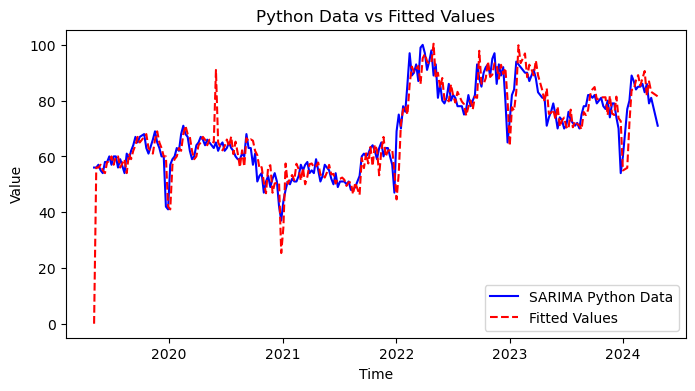

In [30]:
# Plot data and fitted values
plt.figure(figsize=(8, 4))
plt.plot(df['Python'], label='SARIMA Python Data', color='blue')
plt.plot(results_Python.fittedvalues, label='Fitted Values', linestyle='--', color='red')
plt.title('Python Data vs Fitted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


The fitted values track the original data remarkably well throughout the entire time period. The model captures both the general trend and the seasonal fluctuations accurately. 

### Model Selection for Java data

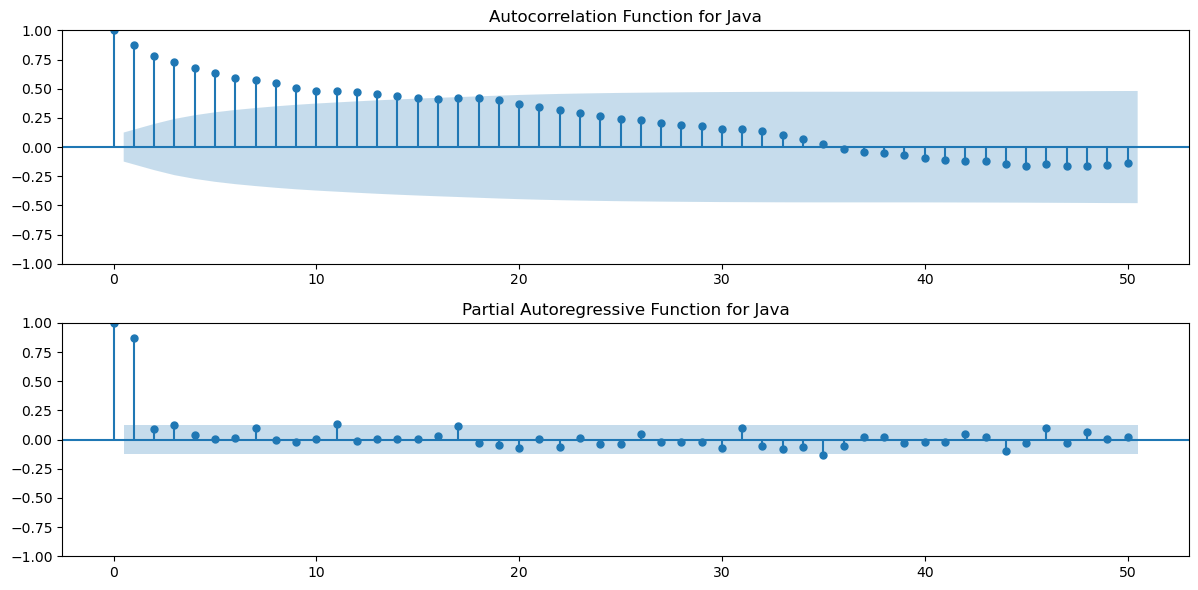

In [31]:
## ACF and PACF plots for Java
fig,(ax1,ax2)=plt.subplots(nrows=2,figsize=(12,6))
plot_acf(df['Java'],lags=50,ax=ax1)
ax1.set_title('Autocorrelation Function for Java')
plot_pacf(df['Java'], lags=50, ax=ax2)
ax2.set_title('Partial Autoregressive Function for Java')
plt.tight_layout()
plt.savefig('Java acf and pacf.png')
plt.show()

#### ACF 

Strong autocorrelation at lag 1 indicates this week's value strongly predicts next week's

The slow decay pattern suggests persistence over multiple weeks

#### PACF

The signficant spike at lag 1 suggests a direct influence from the previous week

The smaller spike at lag 2 suggests some additional influence from two weeks prior

#### Model Selection

##### Non seasonal component(2,1,1):

AR(2): The PACF plot shows significant spikes at lags 1 and 2, then cuts off.

d=1: Despite the ADF test indicating stationarity, the clear U-shaped trend visible in the decomposition plot requires differencing to properly model.

MA(1): The gradually declining ACF suggests an MA component will help capture remaining short term correlations after differencing aand applying the AR terms.

The SARIMA(2,1,1)(1,1,1,52) model captures the short term dynamics through AR(2) as directly indicated by the PACF

It addresses the trend through differencing




### Model Fit for Java

In [32]:
modelJava = SARIMAX(df['Java'], order=(2,1,1), seasonal_order=(1,1,1,52))
results_Java= modelJava.fit()
print(results_Java.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Java   No. Observations:                  248
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -555.533
Date:                            Wed, 21 May 2025   AIC                           1123.067
Time:                                    16:31:08   BIC                           1142.705
Sample:                                         0   HQIC                          1131.018
                                            - 248                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4028      0.153      2.637      0.008       0.103       0.702
ar.L2         -0.1211      0.098   

#### ar.L1:

this is statistically significant at 1% level. Indicates moderate positive autocorrelation with the previous time point after differencing. The positive value suggests that upward movements in the series tend to the followed by further upward movements.

#### ma.L1:

Highly significant with a strong negative coefficient. This indicates that past shocks have a substantial negative impact on current values, suggesting error correction mechanisms in the time series.

#### ma.S.L52:

Significant at the 5% level. The negative coeeficient indicates that seasonal shocks have significant impact on future values with a counteracting effect.

#### sigma2:

Highly significant, indicating the estimated variance of the white noise process is reliably different from zero.

#### Ljung-Box (L1) Test:

high p-value strongly suggests no significant autocorrelation remains in the residuals, which is excellent for a time series models. The model appears to have adequately captured the autocorrelation structure.



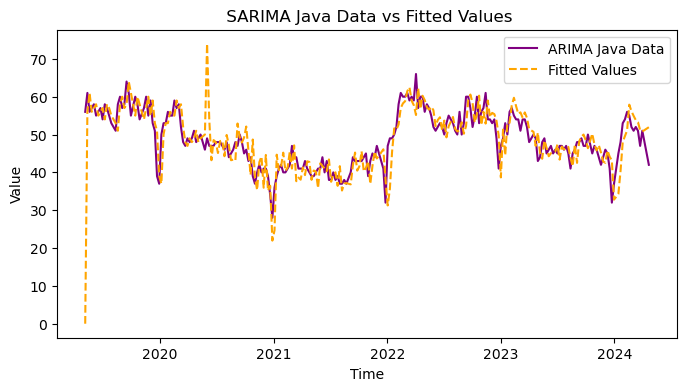

In [33]:
# Plot simulated data and fitted values
plt.figure(figsize=(8, 4))
plt.plot(df['Java'], label='ARIMA Java Data', color='Purple')
plt.plot(results_Java.fittedvalues, label='Fitted Values', linestyle='--', color='orange')
plt.title(' SARIMA Java Data vs Fitted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


The fitted values closely track the original data, indicating a good model fit

#### Visual Fit Assessment:

The model generally tracks the actual data very well throughout the entire period, capturing both the overall trend and many of the short term fluctuations.

### Model Selection for  C++

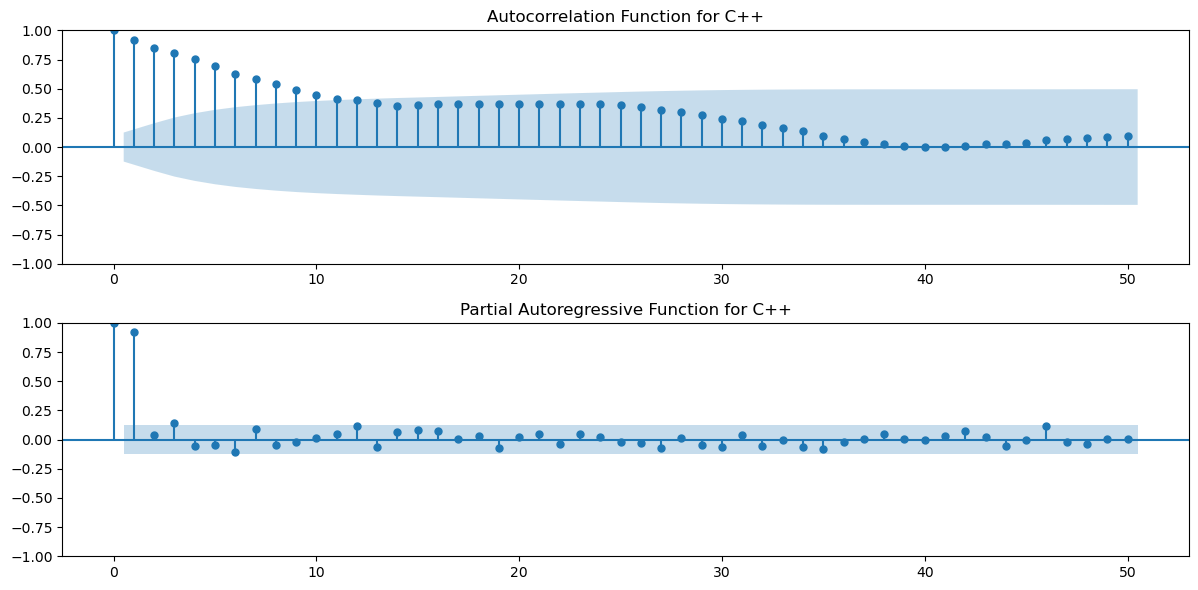

In [34]:
## ACF and PACF plots for C++
fig,(ax1,ax2)=plt.subplots(nrows=2,figsize=(12,6))
plot_acf(df['C++'],lags=50,ax=ax1)
ax1.set_title('Autocorrelation Function for C++')
plot_pacf(df['C++'], lags=50, ax=ax2)
ax2.set_title('Partial Autoregressive Function for C++')
plt.tight_layout()
plt.savefig('C++ acf and pacf.png')
plt.show()

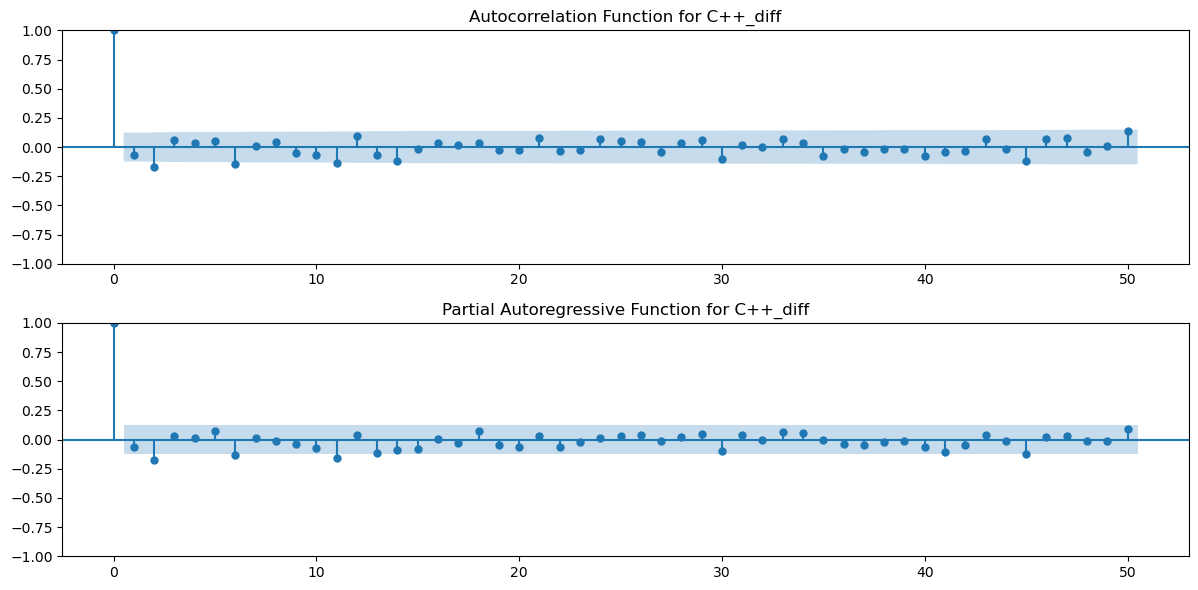

In [35]:
## ACF and PACF plots for C++_diff
fig,(ax1,ax2)=plt.subplots(nrows=2,figsize=(12,6))
plot_acf(df['C++_diff'],lags=50,ax=ax1)
ax1.set_title('Autocorrelation Function for C++_diff')
plot_pacf(df['C++_diff'], lags=50, ax=ax2)
ax2.set_title('Partial Autoregressive Function for C++_diff')
plt.tight_layout()
plt.savefig('C++_diff acf and pacf.png')
plt.show()

##### ACF:

Values hover near zero across all lags

No significant spikes beyond the first lag

This suggests that after differencing, there is little remaining correlation structure

##### PACF:

Shows minimal significant values

##### SARIMA(1,1,1)(1,1,1,52)

The non-stationary trend is effectively addressed through differencing (d=1)

The strong, regular seasonal pattern requires explicit seasonal modeling

Seasonal differencing (D=1) will remove the deterministic seasonal pattern



### Model fit for C++

In [36]:

model3 = SARIMAX(df['C++'], order=(1,1,1), seasonal_order=(1,1,1,52))
model_fit_3 = model3.fit()
print(model_fit_3.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                C++   No. Observations:                  248
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -393.833
Date:                            Wed, 21 May 2025   AIC                            797.666
Time:                                    16:32:42   BIC                            814.031
Sample:                                         0   HQIC                           804.292
                                            - 248                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4642      0.178      2.614      0.009       0.116       0.812
ma.L1         -0.6804      0.158   

#### ar.L1 = 0.6804 (p=0.009):

Strong negative autoregressive effect

highly significant

this indicates that high values tend to be followed by low values

#### ma.L1 = -0.0874 (p=0.706):

Weak negative moving average effect

Not statistically significant

#### ar.S.L52 = -0.5799 (p=0.038):

Moderate negative seasonal autoregressive effect

Statistically significant

#### ma.S.L52 = 2.9016 (p=0.038):

Very strong positive seasonal moving average effect

Highly significant

Large magnitude suggests seasonal shocks have substantial persistent effects

#### Ljung-Box Test 

tests for autocorrelation in residuals

This indicates the model has successfully captured autocorrelation structure



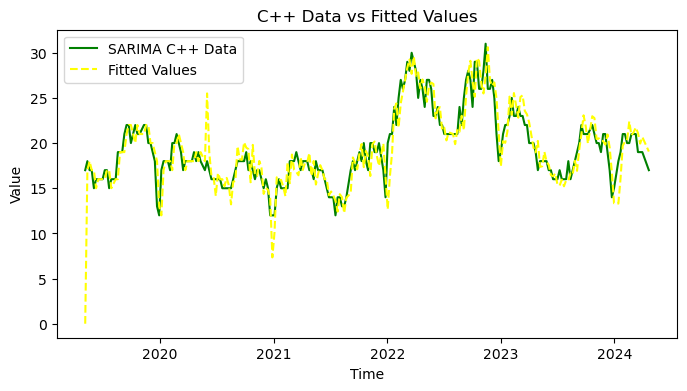

In [37]:
# Plot simulated data and fitted values
plt.figure(figsize=(8, 4))
plt.plot(df['C++'], label='SARIMA C++ Data', color='green')
plt.plot(model_fit_3.fittedvalues, label='Fitted Values', linestyle='--', color='yellow')
plt.title('C++ Data vs Fitted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


#### Model fit

The fitted values track the actual C++ data closely throughout the period, this indicates that the model captured the general trend



# Model Adequacy Checks


###  Analysis of residuals for Python 

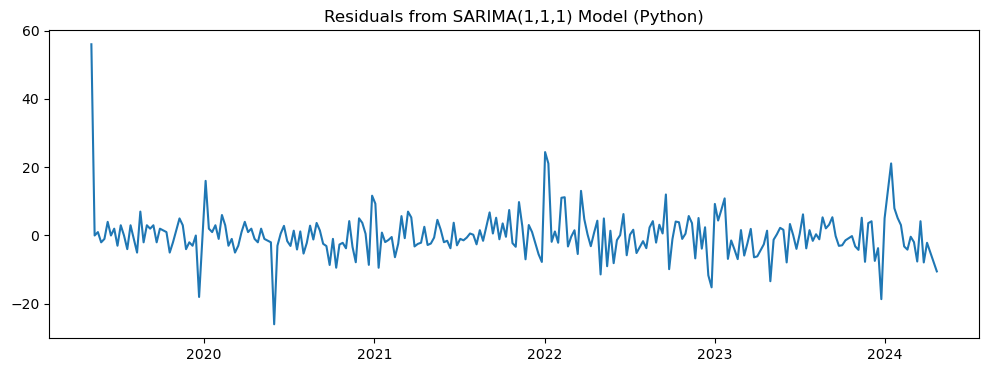

In [38]:
### Analysis of residual for Python 
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt

residuals_Python = results_Python.resid

# Plot residuals
plt.figure(figsize=(12, 4))
plt.plot(residuals_Python)
plt.title("Residuals from SARIMA(1,1,1) Model (Python)")
plt.show()





 
The residuals appear to fluctuate around zero throughout the time period, which is a good sign that the model is capturing the overall level and trend of the data.
 




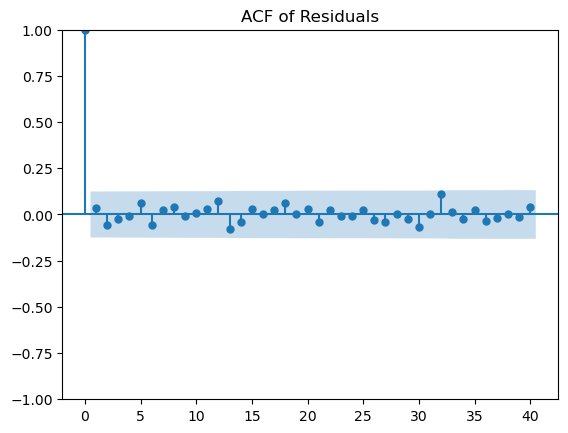

In [41]:
# ACF plot of residuals for Python
sm.graphics.tsa.plot_acf(residuals_Python, lags=40)
plt.title("ACF of Residuals")
plt.show()

#### ACF Plot

The ACF plot shows the correlation between residuala at different lags, Most of the autocorrelations are close to zero and within the confidence bands, which suggests that the residuals are largely uncorrelated across time.

#### Overall Assessment

The analysis suggests that the model is generally appropriate.

In [42]:
# 2. Ljung-Box test (check for autocorrelation) for Python
lb_test = acorr_ljungbox(residuals_Python, lags=[20], return_df=True)
print("Ljung-Box Test:\n", lb_test)


Ljung-Box Test:
      lb_stat  lb_pvalue
20  8.755579   0.985569


### Analysis of residuals for Java

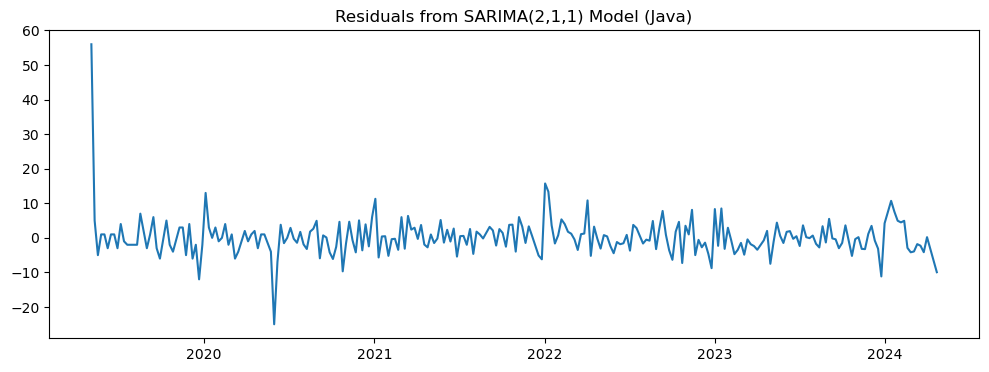

In [39]:
residuals_Java = results_Java.resid

# Plot residuals
plt.figure(figsize=(12, 4))
plt.plot(residuals_Java)
plt.title("Residuals from SARIMA(2,1,1) Model (Java)")
plt.show()





The residuals generally appear to fluctuate randomly around zero, which is a positive sign for a well fitted time series models.



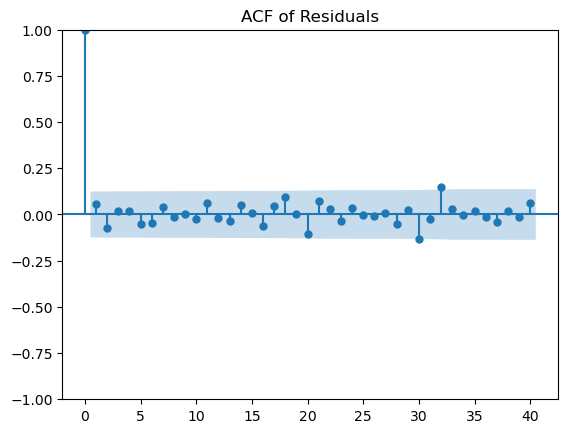

In [43]:
# ACF plot of ressiduals for Java
sm.graphics.tsa.plot_acf(residuals_Java, lags=40)
plt.title("ACF of Residuals")
plt.show()

In [44]:
# 2. Ljung-Box test (check for autocorrelation) for Java
lb_test = acorr_ljungbox(residuals_Java, lags=[20], return_df=True)
print("Ljung-Box Test:\n", lb_test)


Ljung-Box Test:
       lb_stat  lb_pvalue
20  13.503536    0.85475


### Analysis of residuals of C++

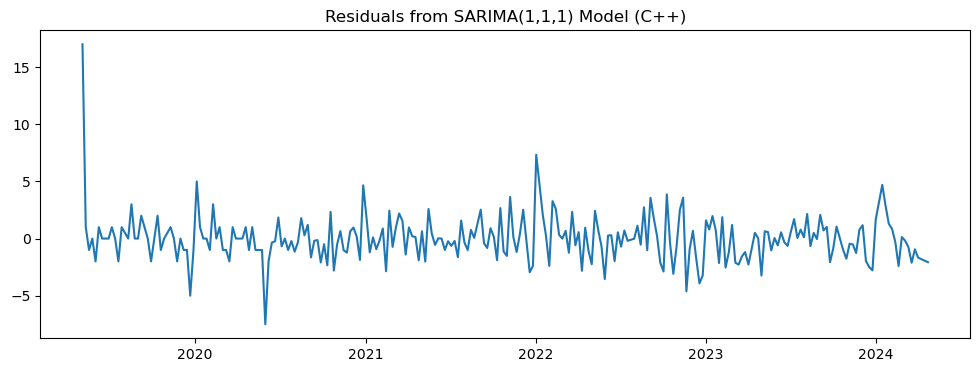

In [40]:
residuals_3 = model_fit_3.resid

# Plot residuals
plt.figure(figsize=(12, 4))
plt.plot(residuals_3)
plt.title("Residuals from SARIMA(1,1,1) Model (C++)")
plt.show()




The plot of residuals oscillate around zero, which is a positive indication for a time series model.




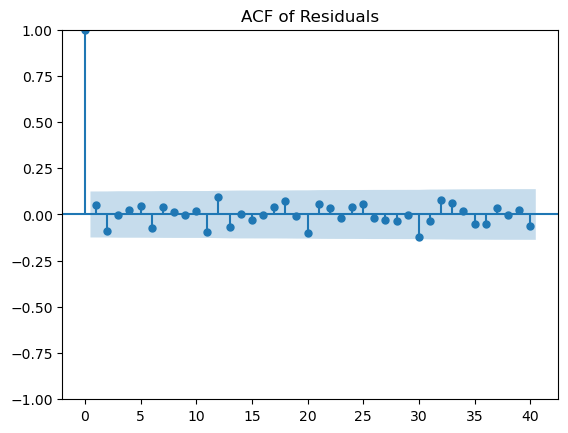

In [45]:
# ACF plot for residuals for C++
sm.graphics.tsa.plot_acf(residuals_3, lags=40)
plt.title("ACF of Residuals")
plt.show()

The autocorrelation values fall within the light blue confidence bands.

The model handles the time series data reletively well, with a few outliers .

In [46]:
# 2. Ljung-Box test (check for autocorrelation) for C++
lb_test = acorr_ljungbox(residuals_3, lags=[20], return_df=True)
print("Ljung-Box Test:\n", lb_test)

Ljung-Box Test:
       lb_stat  lb_pvalue
20  15.915043   0.721881


The p-value of the test of 0.721881, is very high, we strongly fail to reject the null hypothesis,

this provides strong statistical evidence that the residuals are independently distributed 

### 12 week forecast of the data

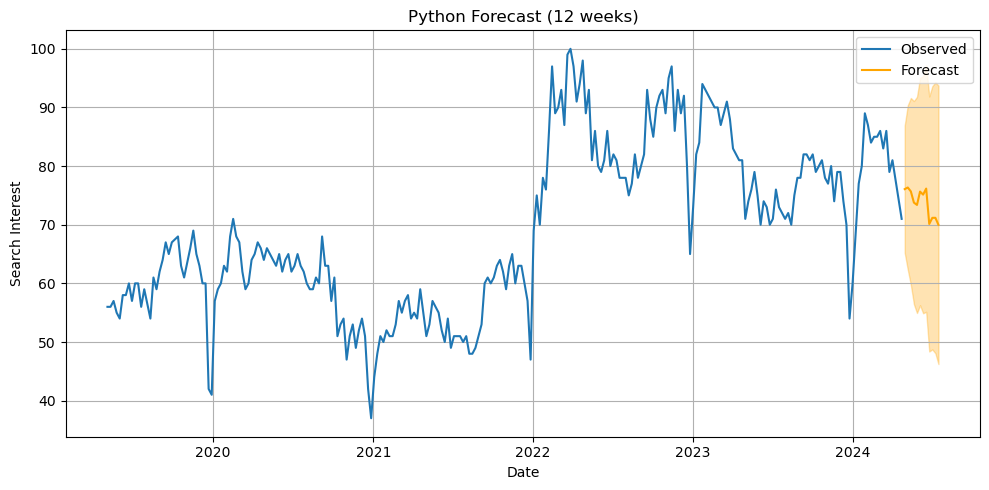

In [47]:
# Forecast 12 weeks For Python
forecast_Python = results_Python.get_forecast(steps=12)
forecast_Python_ci = forecast_Python.conf_int()

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Python'], label='Observed')
forecast_index = pd.date_range(df.index[-1], periods=13, freq='W')[1:]
plt.plot(forecast_index, forecast_Python.predicted_mean, label='Forecast', color='orange')
plt.fill_between(forecast_index, forecast_Python_ci.iloc[:, 0], forecast_Python_ci.iloc[:, 1], color='orange', alpha=0.3)
plt.title('Python Forecast (12 weeks)')
plt.xlabel('Date')
plt.ylabel('Search Interest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

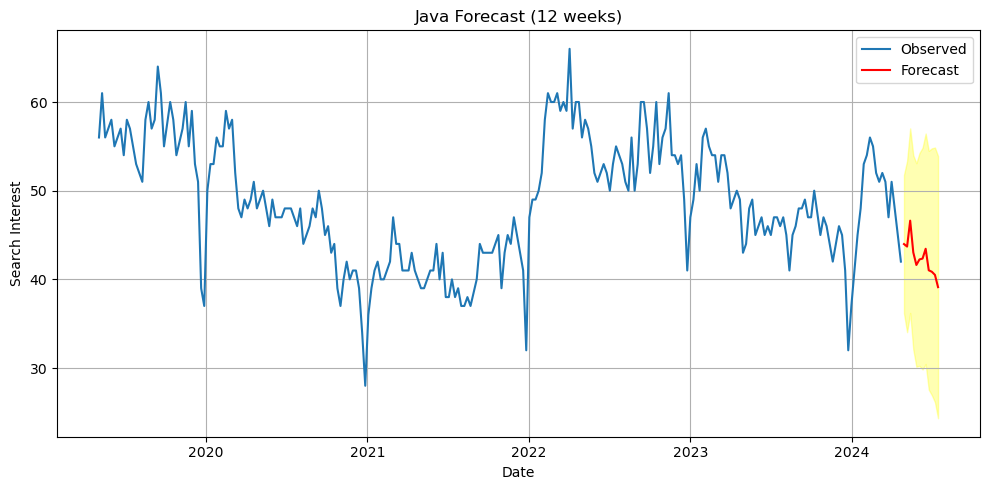

In [48]:
# Forecast 12 weeks For Java
forecast_Java = results_Java.get_forecast(steps=12)
forecast_Java_ci = forecast_Java.conf_int()

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Java'], label='Observed')
forecast_index = pd.date_range(df.index[-1], periods=13, freq='W')[1:]
plt.plot(forecast_index, forecast_Java.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_Java_ci.iloc[:, 0], forecast_Java_ci.iloc[:, 1], color='yellow', alpha=0.3)
plt.title('Java Forecast (12 weeks)')
plt.xlabel('Date')
plt.ylabel('Search Interest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

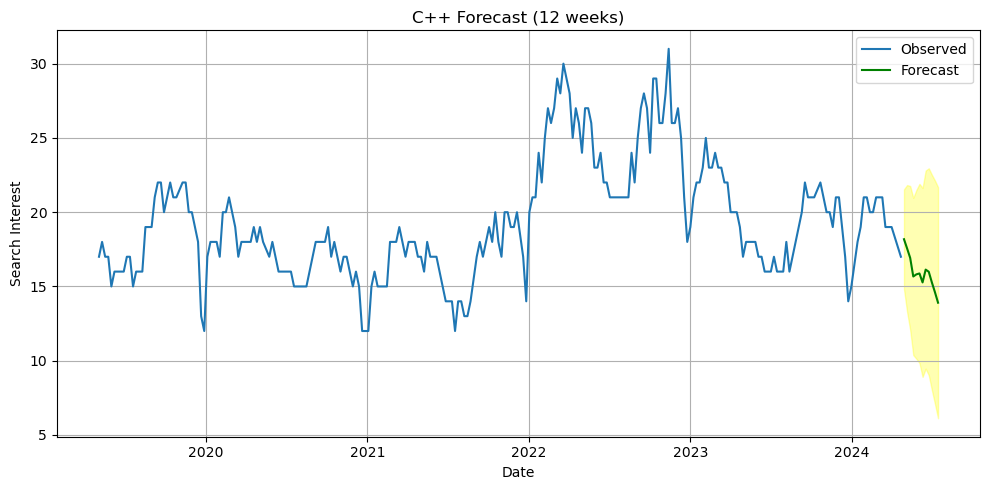

In [49]:
# Forecast 12 weeks For C++
forecast_C = model_fit_3.get_forecast(steps=12)
forecast_C_ci = forecast_C.conf_int()

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['C++'], label='Observed')
forecast_index = pd.date_range(df.index[-1], periods=13, freq='W')[1:]
plt.plot(forecast_index, forecast_C.predicted_mean, label='Forecast', color='green')
plt.fill_between(forecast_index, forecast_C_ci.iloc[:, 0], forecast_C_ci.iloc[:, 1], color='yellow', alpha=0.3)
plt.title('C++ Forecast (12 weeks)')
plt.xlabel('Date')
plt.ylabel('Search Interest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Accuracy of forecasts

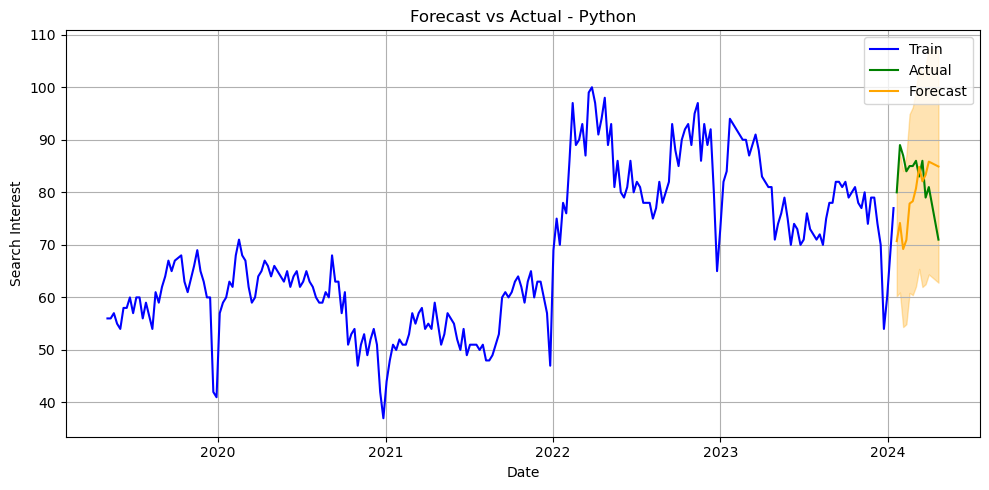

In [50]:
# Split the data (last 12 weeks as test)
train = df.iloc[:-12]
test = df.iloc[-12:]
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA on training data (you can tweak parameters)
model = SARIMAX(train['Python'], order=(1,1,1), seasonal_order=(1,1,1,52))
results = model.fit()
# Forecast for test period
forecast = results.get_forecast(steps=12)
predicted_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
import matplotlib.pyplot as plt

# Plot forecast vs actual
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['Python'], label='Train', color='blue')
plt.plot(test.index, test['Python'], label='Actual', color='green')
plt.plot(test.index, predicted_mean, label='Forecast', color='orange')
plt.fill_between(test.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='orange', alpha=0.3)
plt.title('Forecast vs Actual - Python')
plt.xlabel('Date')
plt.ylabel('Search Interest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


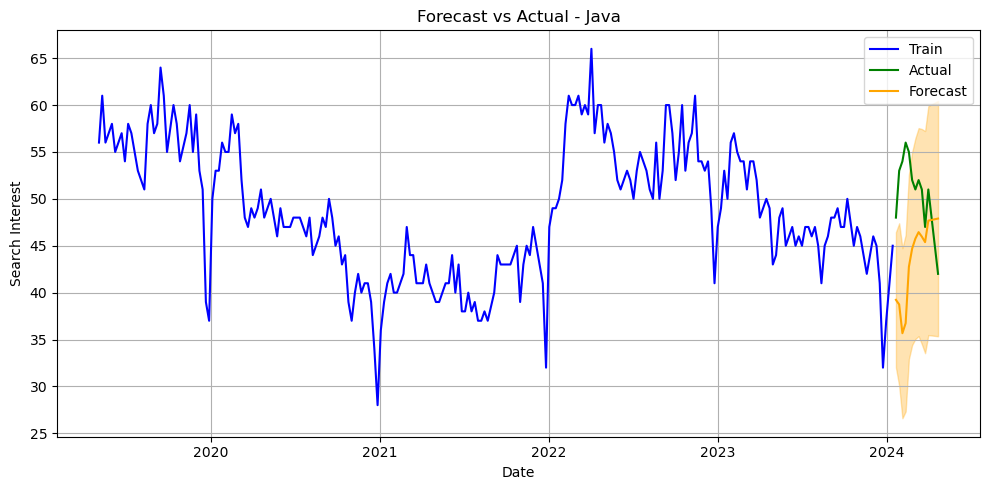

In [51]:
# Split the data (last 12 weeks as test)
train = df.iloc[:-12]
test = df.iloc[-12:]
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA on training data (you can tweak parameters)
modelJava = SARIMAX(train['Java'], order=(2,1,1), seasonal_order=(1,1,1,52))
resultsJava= modelJava.fit()
# Forecast for test period
forecastJava = resultsJava.get_forecast(steps=12)
predicted_mean = forecastJava.predicted_mean
forecastJava_ci = forecastJava.conf_int()
import matplotlib.pyplot as plt

# Plot forecast vs actual
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['Java'], label='Train', color='blue')
plt.plot(test.index, test['Java'], label='Actual', color='green')
plt.plot(test.index, predicted_mean, label='Forecast', color='orange')
plt.fill_between(test.index, forecastJava_ci.iloc[:, 0], forecastJava_ci.iloc[:, 1], color='orange', alpha=0.3)
plt.title('Forecast vs Actual - Java')
plt.xlabel('Date')
plt.ylabel('Search Interest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

moderate forecast accuracy, the forecast captured the general downward trend direction correctly, it underestimated the magnitude

of decline

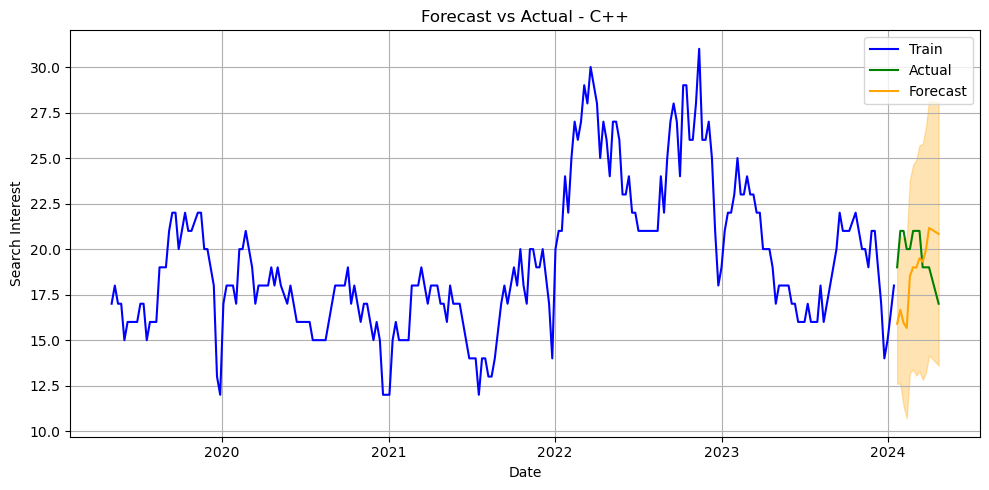

In [52]:
# Split the data (last 12 weeks as test)
train = df.iloc[:-12]
test = df.iloc[-12:]
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA on training data (you can tweak parameters)
modelC = SARIMAX(train['C++'], order=(1,1,1), seasonal_order=(1,1,1,52))
resultsC= modelC.fit()
# Forecast for test period
forecastC = resultsC.get_forecast(steps=12)
predicted_mean = forecastC.predicted_mean
forecastC_ci = forecastC.conf_int()
import matplotlib.pyplot as plt

# Plot forecast vs actual
plt.figure(figsize=(10, 5))
plt.plot(train.index, train['C++'], label='Train', color='blue')
plt.plot(test.index, test['C++'], label='Actual', color='green')
plt.plot(test.index, predicted_mean, label='Forecast', color='orange')
plt.fill_between(test.index, forecastC_ci.iloc[:, 0], forecastC_ci.iloc[:, 1], color='orange', alpha=0.3)
plt.title('Forecast vs Actual - C++')
plt.xlabel('Date')
plt.ylabel('Search Interest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

good forecast accuracy, the forecast closely matched both the direction and magnitude of change,

## Appropriateness of chosen forecasting method

### Python

From the plot of  fitted data ,  i see the model captures both the general trend and seasonal fluctuations effectively, the strong alignment between actual and fitted values indicates the model parameters are well calibrated

The plot of residuals shows that residuals fluctuate around zero throughout time period, indicating no systematic bias, The residuals appear to have relatively constant variance

The acf of residuals are approximately shows most values falling the confidence bands, This indicates the residuals are approximately white noise, confirming the model has adequately captured the temporal dependencies

### Java

From the plot of fitted data, we see that the fitted values track the original Java data

The residuals fluctuate randomly around zero, this supports model adequacy and suggests the SARIMA model has captured the underlying structure

The acf of residuals shows that there is no significant autocorrelation in residuals, this confirms that the model has adequately the temporal dependencies

model diagonistics support the chosen specification, ACF analysis validates the absence of remaining autocorrelation.


### C++

The residual analysis plot shows values oscillating around zero with no clear, indicating good model fit

ACF of residuals: the autocorrelation values fall within confidence bands, confirming residuals are approximately white noise

The fitted vs actual comparison shows the model captures both trend and seasonal variations well

